In [1]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
def train_word2vec_model(sentences):
    model = Word2Vec(
        sentences=sentences,
        vector_size=100,
        window=5,
        min_count=1,
        sg=0 # CBOW
    )
    return model

In [3]:
def calculate_similarity(model, word1, word2):
    return model.wv.similarity(word1, word2)


def find_most_similar_words(model, word, topn=5):
    return model.wv.most_similar(word, topn=topn)


def word_analogies(model, word1, word2, word3, topn=5):
    return model.wv.most_similar(positive=[word1, word3], negative=[word2], topn=topn)

In [4]:
sentences = [
	["natural", "language", "processing", "is", "a", "subfield", "of", "artificial", "intelligence"],
	["word", "embeddings", "capture", "semantic", "meanings", "of", "words"],
	["machine", "learning", "techniques", "are", "widely", "used", "in", "text", "mining"],
	["vector", "semantics", "enable", "semantic", "similarities", "between", "words"],
	["deep", "learning", "models", "have", "revolutionized", "language", "processing"]
]

# Train model
model = train_word2vec_model(sentences)

In [5]:
# Test similarity
sim1 = calculate_similarity(model, "learning", "processing")
print(f"Similarity between 'learning' and 'processing': {sim1:.4f}")

sim2 = calculate_similarity(model, "learning", "capture")
print(f"Similarity between 'learning' and 'capture': {sim2:.4f}")

sim3 = calculate_similarity(model, "text", "word")
print(f"Similarity between 'text' and 'word': {sim3:.4f}")

sim4 = calculate_similarity(model, "deep", "widely")
print(f"Similarity between 'deep' and 'widely': {sim4:.4f}")

sim5 = calculate_similarity(model, "semantic", "meanings")
print(f"Similarity between 'semantic' and 'meanings': {sim5:.4f}")

Similarity between 'learning' and 'processing': -0.0515
Similarity between 'learning' and 'capture': -0.0378
Similarity between 'text' and 'word': 0.1140
Similarity between 'deep' and 'widely': 0.1869
Similarity between 'semantic' and 'meanings': 0.0161


In [6]:
# Test most similar words
similar1 = find_most_similar_words(model, "learning", topn=3)
print("Most similar words to 'learning':")
for word, score in similar1:
    print(f" {word}: {score:.4f}")

similar2 = find_most_similar_words(model, "meanings", topn=3)
print("\nMost similar words to 'meanings':")
for word, score in similar2:
    print(f" {word}: {score:.4f}")

similar3 = find_most_similar_words(model, "words", topn=3)
print("\nMost similar words to 'words':")
for word, score in similar3:
    print(f" {word}: {score:.4f}")

similar4 = find_most_similar_words(model, "deep", topn=3)
print("\nMost similar words to 'deep':")
for word, score in similar4:
    print(f" {word}: {score:.4f}")

similar5 = find_most_similar_words(model, "capture", topn=3)
print("\nMost similar words to 'capture':")
for word, score in similar5:
    print(f" {word}: {score:.4f}")

Most similar words to 'learning':
 revolutionized: 0.2188
 subfield: 0.2162
 similarities: 0.1954

Most similar words to 'meanings':
 in: 0.1962
 models: 0.1588
 language: 0.1232

Most similar words to 'words':
 intelligence: 0.1669
 deep: 0.1626
 semantic: 0.1389

Most similar words to 'deep':
 widely: 0.1869
 intelligence: 0.1820
 semantic: 0.1754

Most similar words to 'capture':
 have: 0.2467
 of: 0.1782
 text: 0.1714


In [7]:
# Test word analogies
analogy1 = word_analogies(model, "language", "processing", "learning", topn=3)
print("Analogy: 'language' - 'processing' + 'learning':")
for word, score in analogy1:
    print(f" {word}: {score:.4f}")

analogy2 = word_analogies(model, "words", "embeddings", "meanings", topn=3)
print("\nAnalogy: 'words' - 'embeddings' + 'meanings':")
for word, score in analogy2:
    print(f" {word}: {score:.4f}")

analogy3 = word_analogies(model, "machine", "learning", "models", topn=3)
print("\nAnalogy: 'machine' - 'learning' + 'models':")
for word, score in analogy3:
    print(f" {word}: {score:.4f}")

Analogy: 'language' - 'processing' + 'learning':
 in: 0.2057
 capture: 0.1742
 revolutionized: 0.1458

Analogy: 'words' - 'embeddings' + 'meanings':
 intelligence: 0.1934
 enable: 0.1491
 widely: 0.1089

Analogy: 'machine' - 'learning' + 'models':
 text: 0.1270
 semantics: 0.1261
 vector: 0.1236


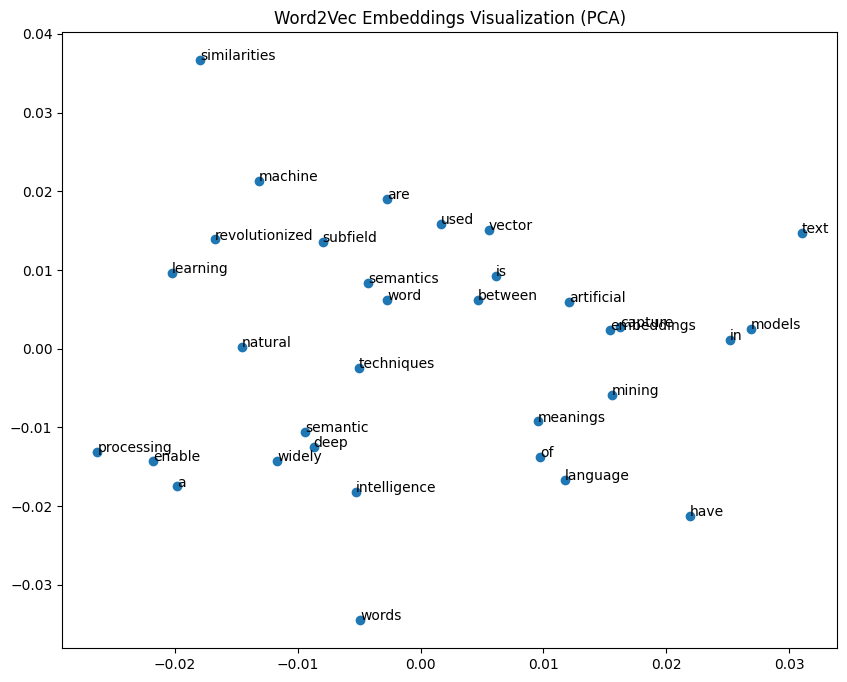

In [8]:
words = list(model.wv.key_to_index.keys())
word_vectors = model.wv[words]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.title("Word2Vec Embeddings Visualization (PCA)")
plt.show()

c:\Users\HanDong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


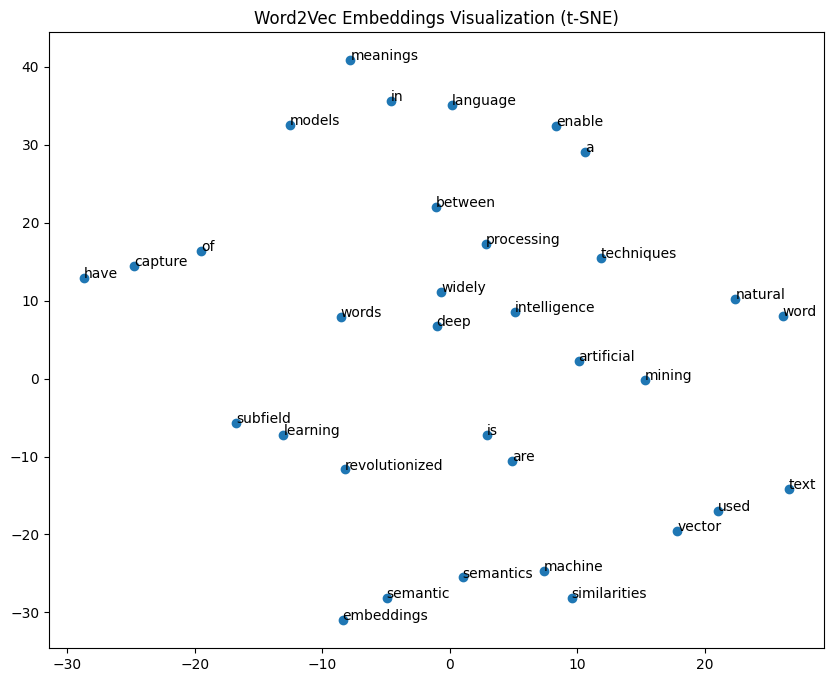

In [9]:
# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.title("Word2Vec Embeddings Visualization (t-SNE)")
plt.show()